**Step 1: Import Necessary Libraries**

In [6]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt


 **Step 2: Datasets**

In [7]:
transport_bus = pd.read_csv("/content/Bus_Stop_Shelter_20250304.csv")
transport_subway = pd.read_csv("/content/MTA_Subway_Stations.csv")
transport_stops = pd.read_csv("/content/Transportation_Sites_20250304.csv")

shops_1 = pd.read_csv("/content/shop_project_20250304.csv")
shops_2 = pd.read_csv("/content/Recognized_Shop_Healthy_Stores_20250304.csv")
restaurants = pd.read_csv("/content/google_maps_restaurants(cleaned).csv")

 **Step 3: Clean the Data & Filter Data for Midtown Manhattan**

In [8]:
# Public Transport Hubs
transport_bus.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
transport_subway.rename(columns={'GTFS Latitude': 'latitude', 'GTFS Longitude': 'longitude'}, inplace=True)
transport_stops.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)

# Retail & Shopping Areas
shops_1.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
shops_2.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)

# Food & Dining Spaces
restaurants.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)

print(transport_bus.columns)
print(transport_subway.columns)
print(transport_stops.columns)
print(shops_1.columns)
print(shops_2.columns)
print(restaurants.columns)


Index(['the_geom', 'BoroCode', 'BoroName', 'BoroCD', 'CounDist', 'AssemDist',
       'StSenDist', 'CongDist', 'Shelter_ID', 'Corner', 'On_Street',
       'Cross_Stre', 'longitude', 'latitude', 'NTAName', 'FEMAFldz',
       'FEMAFldT', 'HrcEvac'],
      dtype='object')
Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'latitude', 'longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference'],
      dtype='object')
Index(['School_Year', 'OPT_Code', 'Name', 'Affiliation', 'Site_Type',
       'Street_Address', 'City', 'State', 'Zip', 'longitude', 'latitude',
       'Door_To_Door_Service', 'Stop_To_School_Service',
       'Common_Carrier_Svc_Metrocards', 'Site_Reimbursement',
       'Mid_Day_Service', 'D2D_Late_Day_Programs', 'S2S_Late_Day_Programs'],
      dtype='object')
Index(['Unique Key', 'Created Date', '

In [9]:
transport_bus.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)
transport_subway.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)
transport_stops.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)
shops_1.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)
shops_2.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)
restaurants.rename(columns={'Lat': 'latitude', 'Lon': 'longitude'}, inplace=True)


In [10]:
lat_min, lat_max = 40.73, 40.77
lon_min, lon_max = -73.99, -73.96

In [11]:
midtown_transport_bus = transport_bus[(transport_bus['latitude'].between(lat_min, lat_max)) &
                                      (transport_bus['longitude'].between(lon_min, lon_max))]

midtown_transport_subway = transport_subway[(transport_subway['latitude'].between(lat_min, lat_max)) &
                                            (transport_subway['longitude'].between(lon_min, lon_max))]

midtown_transport_stops = transport_stops[(transport_stops['latitude'].between(lat_min, lat_max)) &
                                          (transport_stops['longitude'].between(lon_min, lon_max))]


In [12]:
midtown_shops_1 = shops_1[(shops_1['latitude'].between(lat_min, lat_max)) &
                          (shops_1['longitude'].between(lon_min, lon_max))]

midtown_shops_2 = shops_2[(shops_2['latitude'].between(lat_min, lat_max)) &
                          (shops_2['longitude'].between(lon_min, lon_max))]

In [13]:
midtown_restaurants = restaurants[(restaurants['latitude'].between(lat_min, lat_max)) &
                                  (restaurants['longitude'].between(lon_min, lon_max))]


**Step 4: Exploratory Data Analysis (EDA)**

**1. Transport Data Analysis**

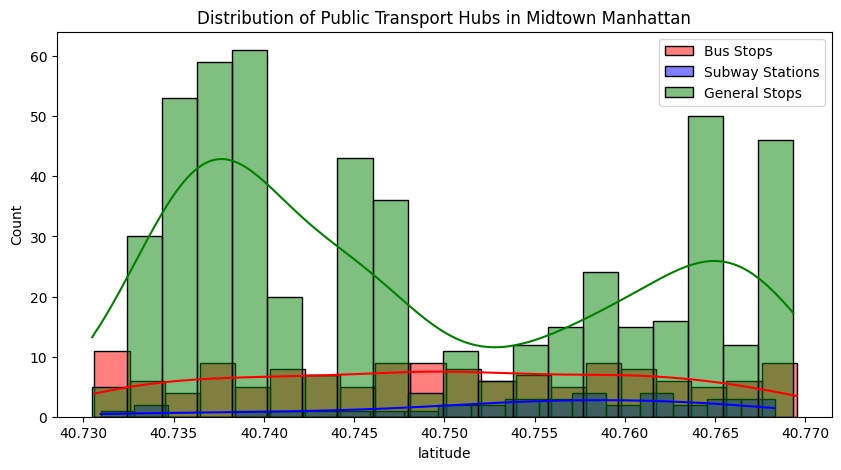

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(midtown_transport_bus['latitude'], bins=20, color='red', label='Bus Stops', kde=True)
sns.histplot(midtown_transport_subway['latitude'], bins=20, color='blue', label='Subway Stations', kde=True)
sns.histplot(midtown_transport_stops['latitude'], bins=20, color='green', label='General Stops', kde=True)
plt.title("Distribution of Public Transport Hubs in Midtown Manhattan")
plt.legend()
plt.show()


 **2. Retail & Shopping Analysis**

In [15]:
print(midtown_shops_1.columns)
print(midtown_shops_2.columns)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'latitude', 'longitude', 'Location'],
      dtype='object')
Index(['Store Name', 'Street Address', 'Borough', 'Zip \nCode', 'Year Awarded',
       'Program \nWave', 'latitude', 'longitude', 'Community Board',
       'Council District', 'BIN', 'BBL',

In [17]:
shops_2_manhattan = shops_2[shops_2['Borough'].str.contains('Manhattan', case=False, na=False)]
print(shops_2_manhattan.shape)  # Check if there are any rows


(13, 14)


In [18]:
midtown_shops_1 = midtown_shops_1[midtown_shops_1['Borough'].str.contains('Manhattan', case=False, na=False)]
midtown_shops_2 = midtown_shops_2[midtown_shops_2['Borough'].str.contains('Manhattan', case=False, na=False)]


In [19]:
midtown_shops_1 = shops_1[(shops_1['latitude'].between(40.73, 40.77)) &
                          (shops_1['longitude'].between(-74.00, -73.95))]

midtown_shops_2 = shops_2[(shops_2['latitude'].between(40.73, 40.77)) &
                          (shops_2['longitude'].between(-74.00, -73.95))]


In [20]:
print(shops_2['Borough'].unique())  # Check the exact names


['Bronx' 'Brooklyn' 'New York' 'Manhattan']


In [21]:
shops_2_manhattan = shops_2[shops_2['Borough'].isin(['Manhattan', 'New York'])]
print(shops_2_manhattan.shape)  # Should NOT be (0, x)


(152, 14)


In [22]:
print(midtown_shops_1[['latitude', 'longitude']].describe())



        latitude  longitude
count   3.000000   3.000000
mean   40.733074 -73.954266
std     0.002546   0.000658
min    40.730133 -73.955025
25%    40.732338 -73.954455
50%    40.734544 -73.953886
75%    40.734544 -73.953886
max    40.734544 -73.953886


In [23]:
print(shops_2_manhattan[['latitude', 'longitude']].describe())


         latitude   longitude
count  148.000000  148.000000
mean    40.803461  -73.944089
std      0.010288    0.005805
min     40.786099  -73.962436
25%     40.794818  -73.947798
50%     40.801894  -73.943345
75%     40.813223  -73.939852
max     40.821482  -73.932769


In [24]:
print(shops_2_manhattan['Borough'].unique())  # Replace with the correct dataset name


['New York' 'Manhattan']


In [25]:
whos


Variable                   Type         Data/Info
-------------------------------------------------
folium                     module       <module 'folium' from '/u<...>ages/folium/__init__.py'>
lat_max                    float        40.77
lat_min                    float        40.73
lon_max                    float        -73.96
lon_min                    float        -73.99
midtown_restaurants        DataFrame                             <...>  10001  \n629    10003  
midtown_shops_1            DataFrame        Unique Key           <...>\n\n[3 rows x 39 columns]
midtown_shops_2            DataFrame    Empty DataFrame\nColumns:<...> (NTA) (2020)]\nIndex: []
midtown_transport_bus      DataFrame                             <...>\n[142 rows x 18 columns]
midtown_transport_stops    DataFrame          School_Year OPT_Cod<...>\n[525 rows x 18 columns]
midtown_transport_subway   DataFrame        GTFS Stop ID  Station<...> (-73.987823 40.749719)  
pd                         module       <m

In [28]:
shops_2_manhattan = shops_2[shops_2['Borough'].str.strip().isin(["New York", "Manhattan"])]
print(shops_2_manhattan.shape)


(152, 14)


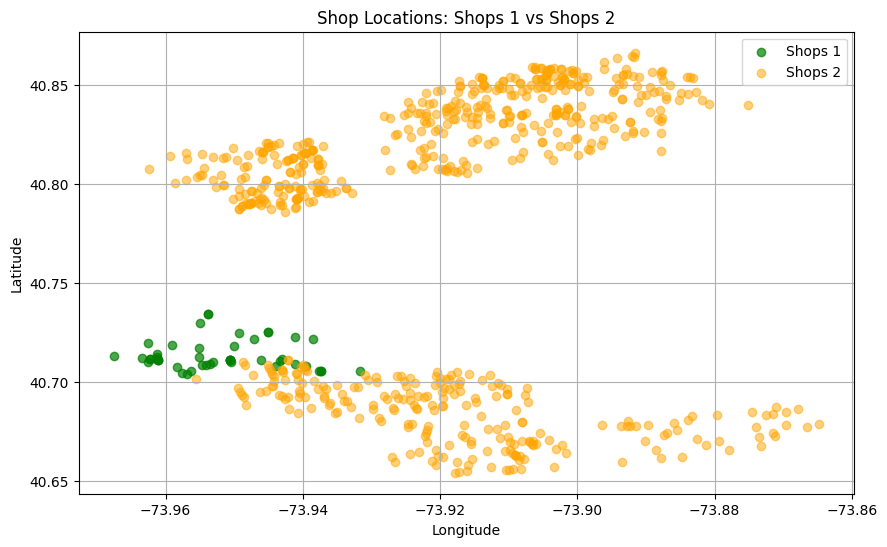

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot shops_1 in green
plt.scatter(shops_1["longitude"], shops_1["latitude"], c='green', alpha=0.7, label="Shops 1")

# Plot shops_2 in orange
plt.scatter(shops_2["longitude"], shops_2["latitude"], c='orange', alpha=0.5, label="Shops 2")

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Shop Locations: Shops 1 vs Shops 2")
plt.legend()
plt.grid()

# Show the plot
plt.show()


 **3. Restaurant Analysis**

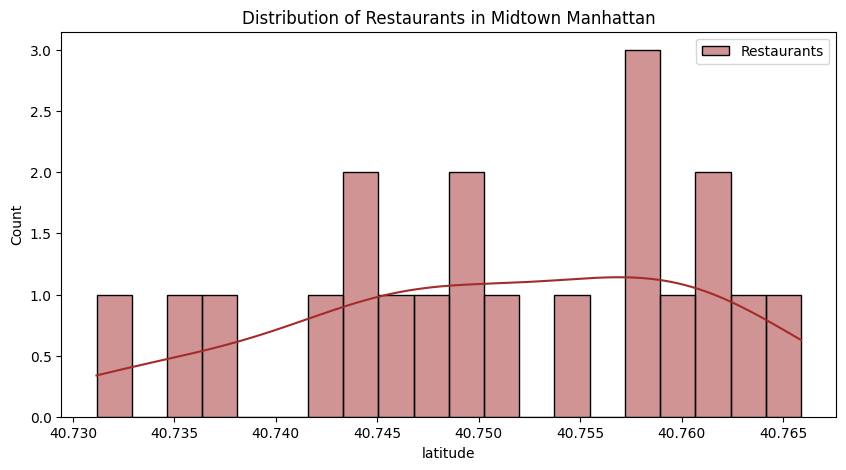

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(midtown_restaurants['latitude'], bins=20, color='brown', label='Restaurants', kde=True)
plt.title("Distribution of Restaurants in Midtown Manhattan")
plt.legend()
plt.show()

**Merging all the three categories**

In [31]:
def create_map(data, title, color, icon):
    m = folium.Map(location=[40.75, -73.98], zoom_start=14, tiles='CartoDB positron')
    for _, row in data.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=row.get('name', 'Unknown'),
                      icon=folium.Icon(color=color, icon=icon)).add_to(m)
    return m


In [32]:
# Maps for each dataset
bus_map = create_map(midtown_transport_bus, "Bus Stops in Midtown", "red", "info-sign")
subway_map = create_map(midtown_transport_subway, "Subway Stations in Midtown", "blue", "cloud")
stops_map = create_map(midtown_transport_stops, "General Stops in Midtown", "green", "ok-sign")
shops_map = create_map(pd.concat([midtown_shops_1, midtown_shops_2]), "Shops in Midtown", "purple", "shopping-cart")
restaurants_map = create_map(midtown_restaurants, "Restaurants in Midtown", "orange", "cutlery")

In [57]:
import folium

# Create a single map centered around Midtown Manhattan
combined_map = folium.Map(location=[40.75, -73.98], zoom_start=14)

# Function to add markers to a feature group
def add_markers(data, name, color, icon):
    feature_group = folium.FeatureGroup(name=name)
    for _, row in data.iterrows():
        lat_col = next((col for col in row.index if 'lat' in col.lower()), None)
        lon_col = next((col for col in row.index if 'lon' in col.lower()), None)
        if lat_col and lon_col and pd.notnull(row[lat_col]) and pd.notnull(row[lon_col]):
            folium.Marker(
                location=[row[lat_col], row[lon_col]],
                popup=f"{name}: {row.get('Name', 'Unknown')}",
                icon=folium.Icon(color=color, icon=icon)
            ).add_to(feature_group)
    feature_group.add_to(combined_map)

# Add each dataset to the combined map
add_markers(midtown_transport_bus, "Bus Stops", "red", "info-sign")
add_markers(midtown_transport_subway, "Subway Stations", "blue", "cloud")
add_markers(midtown_transport_stops, "General Stops", "green", "ok-sign")
add_markers(pd.concat([midtown_shops_1, midtown_shops_2]), "Shops", "purple", "shopping-cart")
add_markers(midtown_restaurants, "Restaurants", "orange", "cutlery")

# Add layer control to toggle visibility
folium.LayerControl().add_to(combined_map)

# Display the final combined map
combined_map


\ Midtown Transport Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   the_geom                       142 non-null    object 
 1   BoroCode                       142 non-null    float64
 2   BoroName                       142 non-null    object 
 3   BoroCD                         142 non-null    float64
 4   CounDist                       142 non-null    float64
 5   AssemDist                      142 non-null    float64
 6   StSenDist                      142 non-null    float64
 7   CongDist                       142 non-null    float64
 8   Shelter_ID                     142 non-null    object 
 9   Corner                         142 non-null    object 
 10  On_Street                      142 non-null    object 
 11  Cross_Stre                     142 non-null    object 
 12  longitude            

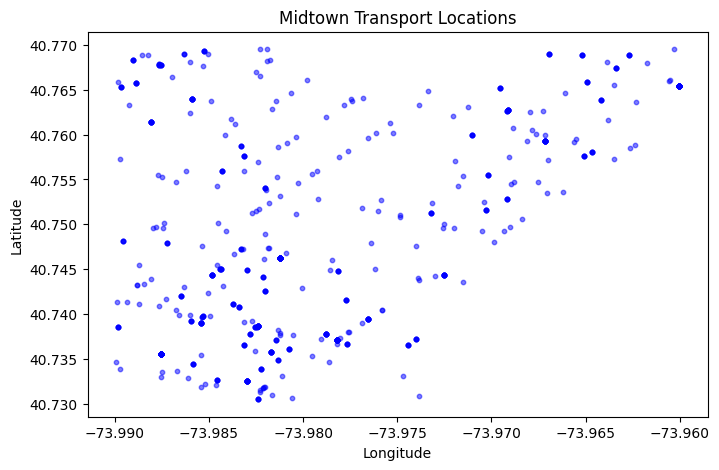

In [42]:
# Merge transport data
midtown_transport = pd.concat([midtown_transport_bus, midtown_transport_stops, midtown_transport_subway], ignore_index=True).drop_duplicates()

# Basic info
print("\ Midtown Transport Overview")
print(midtown_transport.info())

# Plot transport locations
plt.figure(figsize=(8, 5))
plt.scatter(midtown_transport["longitude"], midtown_transport["latitude"], alpha=0.5, s=10, color="blue")
plt.title("Midtown Transport Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


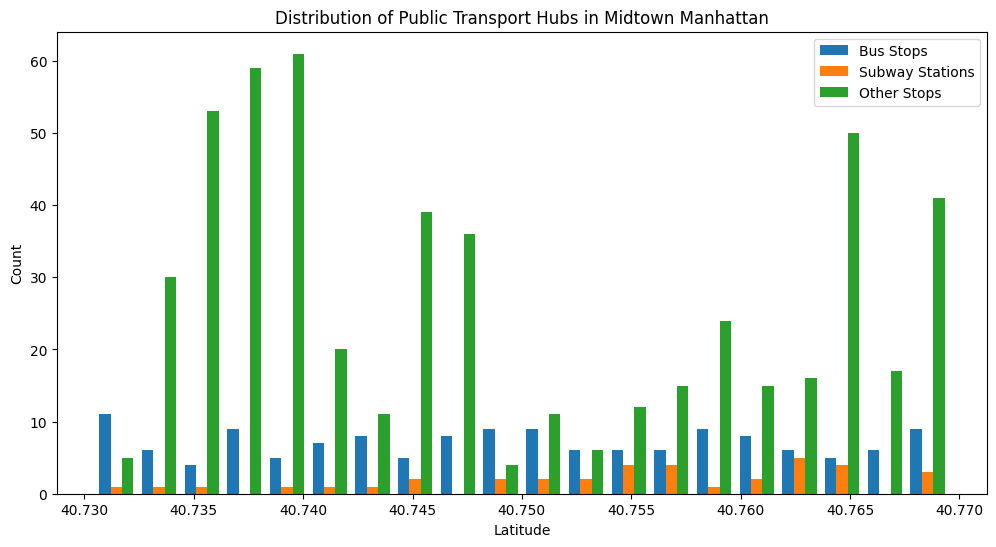

In [41]:
plt.figure(figsize=(12, 6))
plt.hist([midtown_transport_bus['latitude'], midtown_transport_subway['latitude'], midtown_transport_stops['latitude']],
         label=['Bus Stops', 'Subway Stations', 'Other Stops'], bins=20)
plt.title("Distribution of Public Transport Hubs in Midtown Manhattan")
plt.xlabel("Latitude")
plt.ylabel("Count")
plt.legend()
plt.show()



 Midtown Shops Overview
         Unique Key  Incident Zip  Landmark  X Coordinate (State Plane)  \
count  4.900000e+01     49.000000       0.0                4.900000e+01   
mean   3.247306e+07  11215.836735       NaN                9.975723e+05   
std    2.121365e+04     11.721325       NaN                2.384617e+03   
min    3.243468e+07  11206.000000       NaN                9.932540e+05   
25%    3.245400e+07  11211.000000       NaN                9.956130e+05   
50%    3.247909e+07  11211.000000       NaN                9.971270e+05   
75%    3.248762e+07  11222.000000       NaN                9.994910e+05   
max    3.251231e+07  11249.000000       NaN                1.003198e+06   

       Y Coordinate (State Plane)  Vehicle Type  Taxi Company Borough  \
count                   49.000000           0.0                   0.0   
mean                199257.530612           NaN                   NaN   
std                   2718.235167           NaN                   NaN   
min    

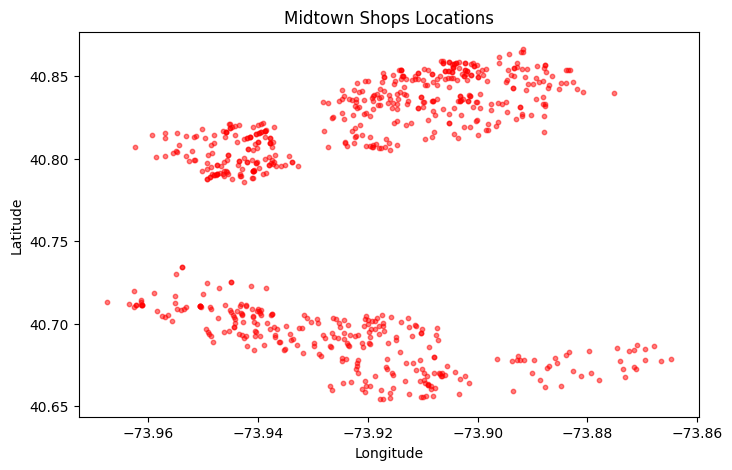

In [43]:
# Merge shops data
midtown_shops = pd.concat([shops_1, shops_2], ignore_index=True).drop_duplicates()

# Summary stats
print("\n Midtown Shops Overview")
print(midtown_shops.describe())

# Plot shop locations
plt.figure(figsize=(8, 5))
plt.scatter(midtown_shops["longitude"], midtown_shops["latitude"], alpha=0.5, s=10, color="red")
plt.title("Midtown Shops Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



 Midtown Restaurants Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   URL               670 non-null    object 
 1   Name              670 non-null    object 
 2   Rating            666 non-null    float64
 3   Rating Count      666 non-null    float64
 4   Detailed Ratings  670 non-null    object 
 5   Price Category    547 non-null    float64
 6   Address           670 non-null    object 
 7   latitude          670 non-null    float64
 8   longitude         670 non-null    float64
 9   ZipCode           670 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 52.5+ KB
None


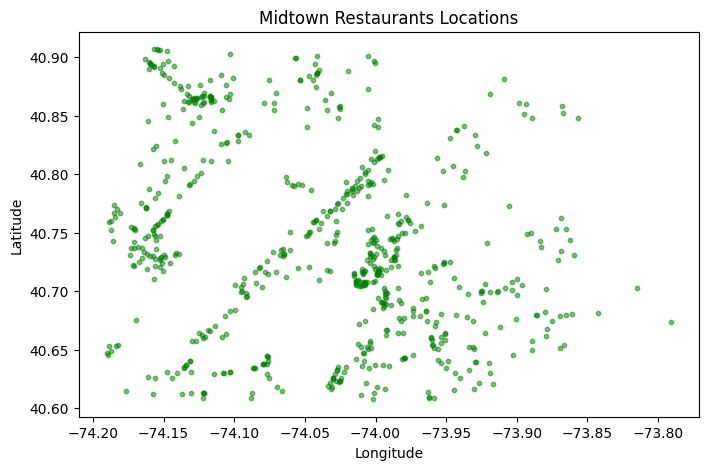

In [44]:
#print("\n Midtown Restaurants Overview")
print(restaurants.info())

# Plot restaurant locations
plt.figure(figsize=(8, 5))
plt.scatter(restaurants["longitude"], restaurants["latitude"], alpha=0.5, s=10, color="green")
plt.title("Midtown Restaurants Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
